# Analysis of the KMeans method and various ways to found an optimal number of clusters

## Import libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Exploratory on the dataset used in this analysis

In [2]:
df = spark.read.parquet("/home/mahjoubi/Documents/github/spark_clustering/data/clustering")
print("Nb of points: {0} \n".format(df.count()))
print("Schema of the dataset:")
df.printSchema()
print("\n View of few lines:")
df.show(5)

Nb of points: 1600 

Schema of the dataset:
root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)


 View of few lines:
+--------------------+-------------------+
|                   x|                  y|
+--------------------+-------------------+
|-0.20238950221237434|-10.080834123062145|
| 0.06854232397134152| -8.965332380418403|
| 0.32753598197755246|-10.634160608925708|
| -0.8719372982768133|-11.149641686748469|
|   1.106409760369123| -9.838363114976202|
+--------------------+-------------------+
only showing top 5 rows



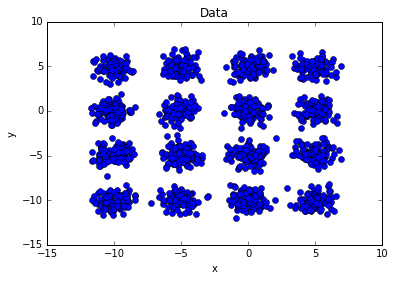

In [3]:
points = df.rdd.map(lambda p: (p["x"], p["y"])).collect()
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], points), map(lambda x: x[1], points), 'o');
ax.set_title("Data");
ax.set_xlabel("x");
ax.set_ylabel("y");
# fig.savefig("../../../figure/clustering/dataset.png")

## Elbow method

In [4]:
data = (spark.read.csv("/home/mahjoubi/Documents/github/spark_clustering/submission/kMeans/elbow.csv", header=True, sep=";", inferSchema=True)
        .rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key=lambda x: x[0])
data[:5]

[(2, 62402.87937580835),
 (3, 38666.705256895024),
 (4, 21661.387854753026),
 (5, 19101.174375487306),
 (6, 16877.666842918235)]

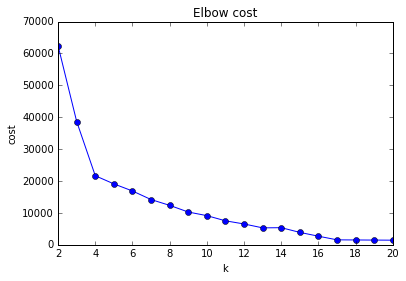

In [5]:
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), 'o-');
ax.set_title("Elbow cost");
ax.set_xlabel("k");
ax.set_ylabel("cost");
# fig.savefig("../../../figure/clustering/elbowIntuitive.png")

## Explained variance

In [6]:
data = (spark.read.csv("/home/mahjoubi/Documents/github/spark_clustering/submission/kMeans/explainedVariance.csv", header=True, sep=";", inferSchema=True).rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key=lambda x: x[0])

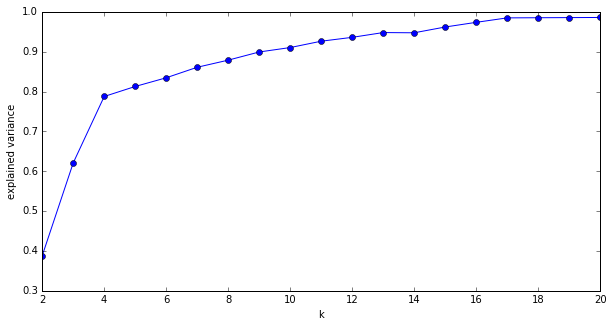

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), "bo-");
ax.set_xlabel("k");
ax.set_ylabel("explained variance");
fig.savefig("../../../figure/clustering/explainedVariance.png")

## ch index

In [8]:
data = (spark.read.csv("/home/mahjoubi/Documents/github/spark_clustering/submission/kMeans/chIndex.csv", header=True, sep=";", inferSchema=True).rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key = lambda x: x[0])

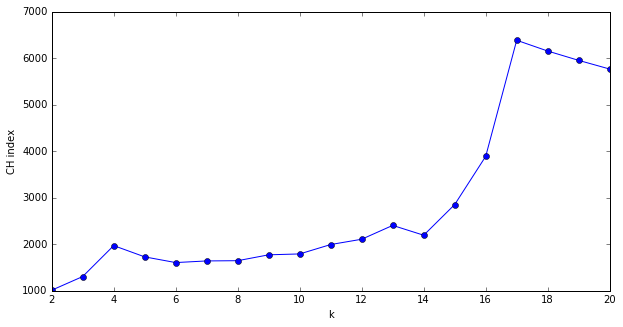

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), "bo-");
ax.set_xlabel("k");
ax.set_ylabel("CH index");
# fig.savefig("../../../figure/clustering/chIndex.png")

In [ ]:
data